Model Accuracy Scores:
Logistic Regression: 0.6154
SVM: 0.6231
Naive Bayes: 0.7769
Random Forest: 0.6462
Logistic Regression (LOO): 0.7308


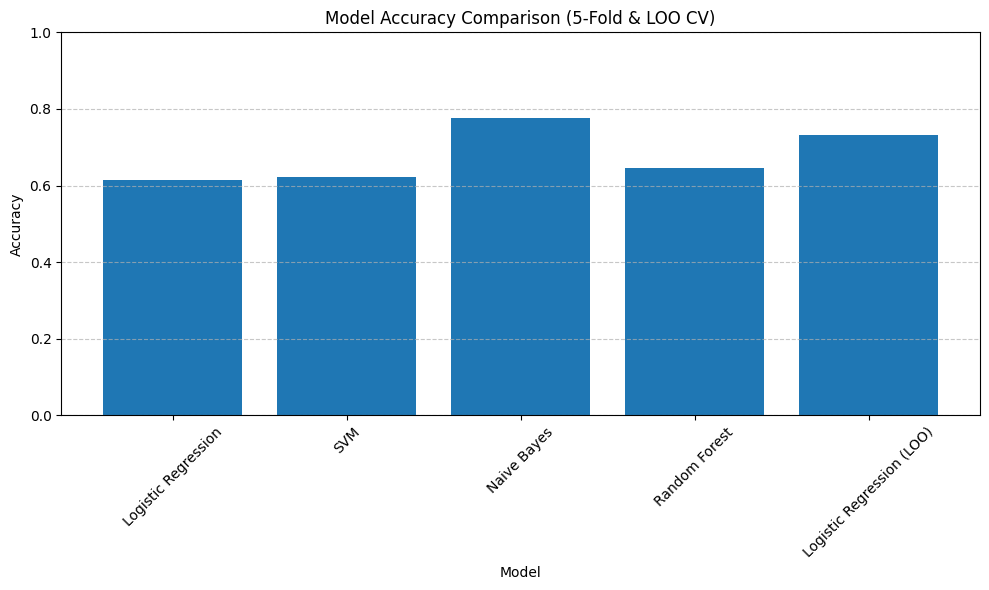

In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv("data_stories_one_shot.csv")  # Ensure the file is in the same directory

# Create binary labels: Stage 1 = Show (0), Stage 2 or 3 = Tell (1)
df['label'] = df['Stage'].apply(lambda x: 0 if x == 1 else 1)

# Define minimal stopwords
custom_stopwords = set([
    'the', 'is', 'in', 'and', 'to', 'with', 'a', 'of', 'for', 'on', 'that',
    'this', 'as', 'an', 'by', 'at', 'from', 'or', 'be', 'are', 'it'
])

# Simple preprocessing function
def simple_preprocess(text):
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [t for t in tokens if t not in custom_stopwords]
    return ' '.join(tokens)

# Apply preprocessing
df['processed_text'] = df['Sentence'].apply(simple_preprocess)

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])
y = df['label']

# Define ML models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier()
}

# Perform 5-Fold Cross-Validation
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    cv_results[name] = scores.mean()

# Perform Leave-One-Out CV for Logistic Regression
loo = LeaveOneOut()
loo_model = LogisticRegression(max_iter=1000)
loo_scores = cross_val_score(loo_model, X, y, cv=loo)
cv_results["Logistic Regression (LOO)"] = loo_scores.mean()

# Print results
print("Model Accuracy Scores:")
for model, score in cv_results.items():
    print(f"{model}: {score:.4f}")

# Plotting model comparison
def plot_model_accuracies(results_dict):
    models = list(results_dict.keys())
    accuracies = list(results_dict.values())

    plt.figure(figsize=(10, 6))
    plt.bar(models, accuracies)
    plt.xlabel("Model")
    plt.ylabel("Accuracy")
    plt.title("Model Accuracy Comparison (5-Fold & LOO CV)")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Visualize
plot_model_accuracies(cv_results)


In [2]:
!pip uninstall keras -y
!pip install keras==2.11.0
!pip install tf-keras
!pip install transformers==4.30.0
!pip install sentence-transformers


Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires keras>=3.5.0, but you have keras 2.11.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
   

In [4]:
#Bonus


import pandas as pd
import string
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Load dataset
df = pd.read_csv("data_stories_one_shot.csv")

# Label: Show = 0, Tell = 1
df['label'] = df['Stage'].apply(lambda x: 0 if x == 1 else 1)

# Basic text cleaning
def clean_text(text):
    return text.lower().translate(str.maketrans('', '', string.punctuation))

df['cleaned'] = df['Sentence'].apply(clean_text)

# Load Sentence-BERT model
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
X = sbert_model.encode(df['cleaned'].tolist())
y = df['label']

# Define models
models = {
    "Logistic Regression (BERT)": LogisticRegression(max_iter=1000),
    "SVM (BERT)": SVC(),
    "Naive Bayes (BERT)": GaussianNB(),
    "Random Forest (BERT)": RandomForestClassifier()
}

# Evaluate using 5-fold cross-validation
bert_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    bert_results[name] = scores.mean()

# Print results
for model, score in bert_results.items():
    print(f"{model}: {score:.4f}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Logistic Regression (BERT): 0.8308
SVM (BERT): 0.8462
Naive Bayes (BERT): 0.8692
Random Forest (BERT): 0.7846
